In [1]:
from utils import *
import cv2
import matplotlib.pyplot as plt
import skimage
from skimage.filters import threshold_otsu as otsu

Using TensorFlow backend.


In [2]:
X, Y = load_dataset(f'data/', pad=14, return_idx=True, addcoords=True)

100%|██████████| 1/1 [00:00<00:00, 29.16it/s](128, 128, 64, 4)



In [3]:
X.shape

(1, 128, 128, 64, 4)

In [4]:
y = Y[0,:,:,:]

def addcoord(x, y):
    kidneyidx = 2
    liveridx = 1
    top = np.argwhere(y == liveridx).min(axis=0)[2]
    left = np.argwhere(y != 0).min(axis=0)[1]
    back = np.argwhere(y != 0).min(axis=0)[0]

    center = np.argwhere(y == kidneyidx).mean(axis=0)
    o = np.round(center).astype('int')

    x = (np.arange(X.shape[1]) - center[0]) / (center[0] - back) 
    y = (np.arange(X.shape[2]) - center[1]) / (center[1] - left)
    z = (np.arange(X.shape[3]) - center[2]) / (center[2] - top)

    xx = np.ones((128, 128, 64)) * x.reshape(128, 1, 1)
    yy = np.ones((128, 128, 64)) * y.reshape(1, 128, 1)
    zz = np.ones((128, 128, 64)) * z.reshape(1, 1, 64)

    coords = np.stack([X[:,:,:,0], xx, yy, zz], axis=3)
    return coords

    

In [5]:
o

array([79, 62, 41])

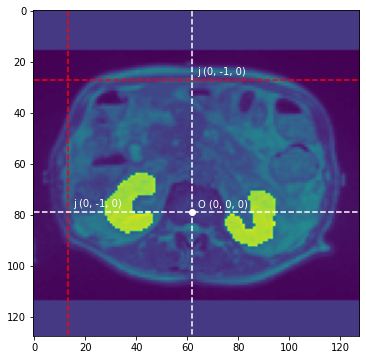

In [6]:
slc = X[0,:,:,o[2],0] + 5 * (Y[0,:,:,o[2]] == 2)
lbl = Y[0,:,:,o[2]]
xc, yc = o[1], o[0]
plt.figure(figsize=(6, 6))
plt.imshow(slc)
plt.scatter(xc, yc, color='w')
plt.plot([xc, xc], [0, 127], '--', color='w')
plt.plot([left, left], [0, 127], '--', color='r')
plt.plot([0, 127], [yc, yc], '--', color='w')
plt.plot([0, 127], [back, back], '--', color='r')

plt.text(xc + 2, yc - 2, 'O (0, 0, 0)', color='w')
plt.text(xc + 2, back - 2, 'j (0, -1, 0)', color='w')
plt.text(left + 2, yc- 2, 'j (0, -1, 0)', color='w')

plt.show()

In [7]:
slc = np.transpose(X[0,:,o[1],:,0] + 5 * (Y[0,:,o[1],:] == 1))

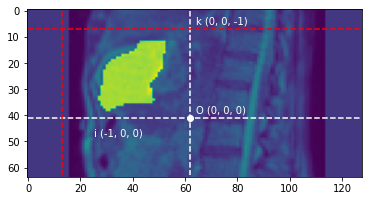

In [8]:
xc, yc = o[1], o[2]
plt.figure(figsize=(6, 6))
plt.imshow(slc)
plt.scatter(xc, yc, color='W')

plt.plot([xc, xc], [0, 63], '--', color='w')
plt.plot([0, 127], [yc, yc], '--', color='w')
plt.plot([0, 127], [top, top], '--', color='r')
plt.plot([left, left], [0, 63], '--', color='r')

plt.text(xc + 2, yc - 2, 'O (0, 0, 0)', color='w')
plt.text(xc + 2, top - 2, 'k (0, 0, -1)', color='w')

plt.text(25, yc + 7, 'i (-1, 0, 0)', color='w')

plt.show()

In [9]:
x = (np.arange(X.shape[1]) - o[0]) / (o[0] - back) 
y = (np.arange(X.shape[2]) - o[1]) / (o[1] - left)
z = (np.arange(X.shape[3]) - o[2]) / (o[2] - top)

In [10]:
xx = np.ones((128, 128, 64)) * x.reshape(128, 1, 1)
yy = np.ones((128, 128, 64)) * y.reshape(1, 128, 1)
zz = np.ones((128, 128, 64)) * z.reshape(1, 1, 64)

In [11]:
coords = np.stack([xx, yy, zz], axis=3)
coords.shape

(128, 128, 64, 3)

In [12]:
coords[0,45,0]

array([-1.51923077, -0.34693878, -1.20588235])

In [13]:
coords[0,2,45]

array([-1.51923077, -1.2244898 ,  0.11764706])